In [6]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from tabGAN import TabGAN
from src import constants as const
import helpers

imports_path = "src//imports.ipynb"

%run "$imports_path"

In [8]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in global vars")

In [9]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

In [10]:
import sys
n_epochs = 300
n_critic = 10
opt_lr = 0.0002
adam_beta1 = 0.5
noise_discrete_unif_max = 0

batch_size = 500

n_synthetic_datasets = 10
n_synthetic_datasets_existing = 0

if sys.platform == "win32":
    jit_compile=True
elif sys.platform == "linux":
    jit_compile=False
else:
    raise RuntimeError("Did not recognize the system platform and therefore does not know how to initialize the storage directory path.")

retrain = True

In [6]:
tg = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = False, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max, jit_compile=jit_compile)

tg_qt = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max, jit_compile=jit_compile)

tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max, jit_compile=jit_compile)

# data_train_changed_dtypes = data_train.copy()
# data_train_changed_dtypes = data_train_changed_dtypes.astype({"capital.gain" : float, "capital.loss" : float})
# tg_qt_dtype = TabGAN(data_train_changed_dtypes, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
#               quantile_transformation_int = True, quantile_rand_transformation = False,
#              noise_discrete_unif_max = noise_discrete_unif_max) 

In [ ]:
if retrain:
    helpers.generate_multiple_datasets(tg, const.dir.data_gen(), n_synthetic_datasets, n_epochs, subfolder = "tabGAN",
                                       n_synthetic_datasets_existing=n_synthetic_datasets_existing, batch_size=batch_size,
                                      overwrite_dataset=False)

In [ ]:
if retrain:
    helpers.generate_multiple_datasets(tg_qt, const.dir.data_gen(), n_synthetic_datasets, n_epochs=300, subfolder = "tabGAN-qt",
                              n_synthetic_datasets_existing=n_synthetic_datasets_existing, batch_size=batch_size,
                                      overwrite_dataset=False)

In [11]:
# if retrain:
#         generate_multiple_datasets(tg_qt_dtype, const.dir.data_gen(), n_synthetic_datasets, n_epochs, subfolder = "tabGAN-qt_changed_dtype",
#                                   n_synthetic_datasets_existing=n_synthetic_datasets_existing)

In [ ]:
if retrain:
    helpers.generate_multiple_datasets(tg_qtr, const.dir.data_gen(), n_synthetic_datasets, n_epochs, subfolder = "tabGAN-qtr",
                              n_synthetic_datasets_existing=n_synthetic_datasets_existing, batch_size=batch_size,
                                      overwrite_dataset=False)

In [ ]:
subfolders = ["tabGAN", "tabGAN-qt", "tabGAN-qtr", "CTGAN-pac10", "CTGAN-pac1", "CTGAN-pac2", "CTGAN-pac10-log_freq=False",
              "tabFairGAN", "tabFairGAN-mod", "TVAE", "TVAE-mod"]#, "TGAN3"]
efficacy_table_25_epochs = helpers.eval.tabular_GAN_ml_efficacy(data_train, data_test, const.dir.data_gen(),
                                                              subfolders, n_synthetic_datasets = 25,
                                                             name_true_train_dataset="Original dataset")
efficacy_table_25_epochs

  0%|          | 0/276 [00:00<?, ?it/s]

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [8]:
subfolders = ["tabGAN", "tabGAN-qt", "tabGAN-qtr", "CTGAN", "tabfairGAN", "tabfairGAN-mod", "TGAN",  "TGAN2"]#, "TGAN3"]
efficacy_table_10_epochs = helpers.eval.tabular_GAN_ml_efficacy(data_train, data_test, const.dir.data_gen(),
                                                              subfolders, n_synthetic_datasets = n_synthetic_datasets,
                                                             name_true_train_dataset="Original dataset")
efficacy_table_10_epochs

  0%|          | 0/81 [00:00<?, ?it/s]

,Dataset,Test Accuracy,Test AUC,SD Accuracy,SD AUC
0,Original dataset,0.865339,0.922935,0,0
1,tabGAN,0.832371,0.883478,0.00493519,0.00390667
2,tabGAN-qt,0.833134,0.882992,0.00156993,0.00303609
3,tabGAN-qtr,0.83413,0.884345,0.00249795,0.00265309
4,CTGAN,0.826866,0.876836,0.00359685,0.00239253
5,tabfairGAN,0.825305,0.876212,0.00336666,0.00277558
6,tabfairGAN-mod,0.828479,0.878413,0.00320194,0.00357693
7,TGAN,0.712988,0.709357,0.0792308,0.154236
8,TGAN2,0.677981,0.814874,0.143013,0.0220018


In [59]:
a = tqdm(total=5)

  0%|          | 0/5 [00:00<?, ?it/s]

In [81]:
subfolders = ["tabGAN", "tabGAN-qt", "tabGAN-qtr", "TGAN", "CTGAN", "tabFairGAN", "tabFairGAN-mod"]
efficacy_table_10_epochs = helpers.eval.tabular_GAN_ml_efficacy(data_train, data_test, const.dir.data_gen(),
                                                              subfolders, n_synthetic_datasets = n_synthetic_datasets,
                                                             name_true_train_dataset="Original dataset")
efficacy_table_10_epochs

  0%|          | 0/71 [00:00<?, ?it/s]

,Dataset,Test Accuracy,Test AUC,SD Accuracy,SD AUC
0,Original dataset,0.865339,0.922935,0,0
1,tabGAN,0.831375,0.880993,0.00574784,0.00417603
2,tabGAN-qt,0.827829,0.877117,0.00281754,0.00277378
3,tabGAN-qtr,0.833147,0.881074,0.00211356,0.00214525
4,TGAN,0.712988,0.709357,0.0792308,0.154236
5,CTGAN,0.825551,0.873378,0.00546233,0.00253119
6,tabFairGAN,0.808519,0.847723,0.00636211,0.00652159
7,tabFairGAN-mod,0.818539,0.867359,0.00417945,0.00337458


In [16]:
# The table used in the paper (in the section comparing machine learning efficacy)
subfolders = ["tabGAN", "tabGAN-qt", "tabGAN-qtr", "TGAN", "CTGAN", "tabFairGAN", "tabFairGAN-mod"]
efficacy_table_10_epochs = evaluate_tabGAN_through_prediction(data_train, data_test, const.dir.data_gen(),
                                                              subfolders, n_synthetic_datasets = n_synthetic_datasets,
                                                             name_true_train_dataset="Original dataset")
efficacy_table_10_epochs

  0%|          | 0/71 [00:00<?, ?it/s]

,Dataset,Test Accuracy,Test AUC,SD Accuracy,SD AUC
0,Original dataset,0.865803,0.922143,0,0
1,tabGAN,0.827264,0.875581,0.00607,0.003768
2,tabGAN-qt,0.822005,0.87225,0.003517,0.003439
3,tabGAN-qtr,0.822019,0.871999,0.002473,0.003072
4,TGAN,0.812882,0.854884,0.008462,0.012246
5,CTGAN,0.825066,0.872641,0.004612,0.002787
6,tabFairGAN,0.809064,0.848356,0.005419,0.005697
7,tabFairGAN-mod,0.819489,0.868218,0.00264,0.003226


In [5]:
n_synthetic_datasets_existing = 5
n_synthetic_datasets = 10
retrain = True
if retrain:
    dataset_dir_ctgan = os.path.join(const.dir.data_gen(), "CTGAN") 
    os.makedirs(dataset_dir_ctgan, exist_ok = True)
    for i in tqdm(range(n_synthetic_datasets_existing, n_synthetic_datasets), desc = "Generated datasets"):
        ctgan = CTGANSynthesizer(epochs=n_epochs, discriminator_steps=n_critic)
        ctgan.fit(data_train, tg.columns_discrete)
        fake_train = ctgan.sample(data_train.shape[0])
        fake_train.to_csv(os.path.join(dataset_dir_ctgan, f"gen{i}.csv"))
        del ctgan
retrain = False

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

In [31]:
%run "$utils_path"
subfolders = ["tabGAN", "tabGAN-qt", "tabGAN-qtr", "TGAN", "CTGAN", "tabFairGAN", "tabFairGAN-mod"]
efficacy_table_10_epochs = evaluate_tabGAN_through_prediction(data_train, data_test, const.dir.data_gen(),
                                                              subfolders, n_synthetic_datasets = 10,
                                                             name_true_train_dataset="Original dataset",
                                                              eval_sd_true_dataset = True)
efficacy_table_10_epochs

  0%|          | 0/80 [00:00<?, ?it/s]

,Dataset,Test Accuracy,Test AUC,SD Accuracy,SD AUC
0,Original dataset,0.865803,0.922143,0.0,0.0
1,tabGAN,0.827264,0.875581,0.00607,0.003768
2,tabGAN-qt,0.822005,0.87225,0.003517,0.003439
3,tabGAN-qtr,0.822019,0.871999,0.002473,0.003072
4,TGAN,0.812882,0.854884,0.008462,0.012246
5,CTGAN,0.825066,0.872641,0.004612,0.002787
6,tabFairGAN,0.809064,0.848356,0.005419,0.005697
7,tabFairGAN-mod,0.819489,0.868218,0.00264,0.003226


In [23]:
print(efficacy_table_10_epochs.to_latex(index=False))

\begin{tabular}{lllll}
\toprule
         Dataset & Test Accuracy &  Test AUC & SD Accuracy &    SD AUC \\
\midrule
Original dataset &      0.865803 &  0.922143 &           0 &         0 \\
          tabGAN &      0.827264 &  0.875581 &     0.00607 &  0.003768 \\
       tabGAN-qt &      0.822005 &   0.87225 &    0.003517 &  0.003439 \\
      tabGAN-qtr &      0.822019 &  0.871999 &    0.002473 &  0.003072 \\
            TGAN &      0.812882 &  0.854884 &    0.008462 &  0.012246 \\
           CTGAN &      0.825066 &  0.872641 &    0.004612 &  0.002787 \\
      tabFairGAN &      0.809064 &  0.848356 &    0.005419 &  0.005697 \\
  tabFairGAN-mod &      0.819489 &  0.868218 &     0.00264 &  0.003226 \\
\bottomrule
\end{tabular}



In [37]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
rng = np.random.RandomState(0)
X = np.transpose([[5,6,6,8]])
qt = QuantileTransformer(n_quantiles=10, random_state=0)
qt.fit_transform(X)

array([[0. ],
       [0.5],
       [0.5],
       [1. ]])

In [32]:
(0.75 + 0.5) / 2

0.625

In [38]:
qt.references_

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [48]:
qt.inverse_transform([[0.1]])

array([[5.3]])

In [12]:
print(efficacy_table_10_epochs.to_latex())

\begin{tabular}{llllll}
\toprule
{} &              Dataset & Test Accuracy &  Test AUC & SD Accuracy &    SD AUC \\
\midrule
0 &  Adult train dataset &      0.825764 &  0.868183 &           0 &         0 \\
1 &               tabGAN &      0.809982 &  0.849922 &    0.002708 &  0.001738 \\
2 &            tabGAN-qt &      0.814475 &  0.853481 &    0.002214 &  0.002868 \\
3 &           tabGAN-qtr &      0.815206 &   0.85484 &    0.000745 &  0.001233 \\
4 &                 TGAN &      0.817131 &  0.851157 &    0.003062 &  0.003001 \\
5 &                CTGAN &      0.813524 &  0.846873 &    0.003154 &  0.002347 \\
6 &           tabFairGAN &        0.8056 &  0.837908 &    0.001732 &  0.001983 \\
7 &       tabFairGAN-mod &      0.817154 &  0.853283 &    0.002469 &  0.002326 \\
\bottomrule
\end{tabular}



In [ ]:
tabulate(efficacy_table_10_epochs, headers='keys', tablefmt='psql')

In [ ]:
for i in range(5,10):
    path = os.path.join(const.dir.data_gen(), f"tabFairGAN-mod//gen{i}.csv")
    data_temp = pd.read_csv(path)
    data_temp.to_csv(path)

In [18]:
print("Adam learning rate:", opt_lr)
%run "$utils_path"
tg_qt = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max,
                gumbel_temperature = 0.5)

dataset_epochs_comparison_dir = os.path.join(const.dir.data_gen(), "tabGAN-qtr//Epoch_comparison")
n_epochs_vec = np.arange(1, 26, 1).tolist() + np.arange(30, 101, 5).tolist()
path_finished_epochs_counter = ".//Python_objects//qtr_existing_n_epochs_tracker.pkl"
n_synthetic_datasets_epochs_comparison = 5

Adam learning rate: 0.0002


In [19]:
generate_multiple_datasets_for_multiple_epochs_fast(tg_qtr, dataset_dir = dataset_epochs_comparison_dir,
                                               n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
                                                    n_epochs_vec = n_epochs_vec,
                                              path_finished_epochs_counter = path_finished_epochs_counter,
                                              redo_n_epochs_vec=[], restart = False)

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch subfolder creation:   0%|          | 0/40 [00:00<?, ?it/s]

Progress training from epoch 0 to 1:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 1 to 2:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 2 to 3:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 3 to 4:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 4 to 5:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 5 to 6:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 6 to 7:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 7 to 8:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 8 to 9:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 9 to 10:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 10 to 11:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 11 to 12:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 12 to 13:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 13 to 14:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 14 to 15:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 15 to 16:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 16 to 17:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 17 to 18:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 18 to 19:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 19 to 20:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 20 to 21:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 21 to 22:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 22 to 23:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 23 to 24:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 24 to 25:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 25 to 30:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 30 to 35:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 35 to 40:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 40 to 45:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 45 to 50:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 50 to 55:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 55 to 60:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 60 to 65:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 65 to 70:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 70 to 75:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 75 to 80:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 80 to 85:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 85 to 90:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 90 to 95:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 95 to 100:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch subfolder creation:   0%|          | 0/40 [00:00<?, ?it/s]

Progress training from epoch 0 to 1:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 1 to 2:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 2 to 3:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 3 to 4:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 4 to 5:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 5 to 6:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 6 to 7:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 7 to 8:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 8 to 9:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 9 to 10:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 10 to 11:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 11 to 12:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 12 to 13:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 13 to 14:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 14 to 15:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 15 to 16:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 16 to 17:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 17 to 18:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 18 to 19:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 19 to 20:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 20 to 21:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 21 to 22:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 22 to 23:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 23 to 24:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 24 to 25:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 25 to 30:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 30 to 35:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 35 to 40:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 40 to 45:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 45 to 50:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 50 to 55:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 55 to 60:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 60 to 65:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 65 to 70:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 70 to 75:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 75 to 80:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 80 to 85:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 85 to 90:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 90 to 95:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 95 to 100:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch subfolder creation:   0%|          | 0/40 [00:00<?, ?it/s]

Progress training from epoch 0 to 1:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 1 to 2:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 2 to 3:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 3 to 4:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 4 to 5:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 5 to 6:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 6 to 7:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 7 to 8:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 8 to 9:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 9 to 10:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 10 to 11:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 11 to 12:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 12 to 13:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 13 to 14:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 14 to 15:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 15 to 16:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 16 to 17:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 17 to 18:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 18 to 19:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 19 to 20:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 20 to 21:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 21 to 22:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 22 to 23:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 23 to 24:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 24 to 25:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 25 to 30:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 30 to 35:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 35 to 40:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 40 to 45:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 45 to 50:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 50 to 55:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 55 to 60:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 60 to 65:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 65 to 70:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 70 to 75:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 75 to 80:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 80 to 85:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 85 to 90:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 90 to 95:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 95 to 100:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch subfolder creation:   0%|          | 0/40 [00:00<?, ?it/s]

Progress training from epoch 0 to 1:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 1 to 2:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 2 to 3:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 3 to 4:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 4 to 5:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 5 to 6:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 6 to 7:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 7 to 8:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 8 to 9:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 9 to 10:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 10 to 11:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 11 to 12:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 12 to 13:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 13 to 14:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 14 to 15:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 15 to 16:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 16 to 17:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 17 to 18:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 18 to 19:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 19 to 20:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 20 to 21:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 21 to 22:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 22 to 23:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 23 to 24:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 24 to 25:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 25 to 30:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 30 to 35:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 35 to 40:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 40 to 45:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 45 to 50:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 50 to 55:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 55 to 60:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 60 to 65:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 65 to 70:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 70 to 75:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 75 to 80:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 80 to 85:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 85 to 90:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 90 to 95:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 95 to 100:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch subfolder creation:   0%|          | 0/40 [00:00<?, ?it/s]

Progress training from epoch 0 to 1:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 1 to 2:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 2 to 3:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 3 to 4:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 4 to 5:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 5 to 6:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 6 to 7:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 7 to 8:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 8 to 9:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 9 to 10:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 10 to 11:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 11 to 12:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 12 to 13:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 13 to 14:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 14 to 15:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 15 to 16:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 16 to 17:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 17 to 18:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 18 to 19:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 19 to 20:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 20 to 21:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 21 to 22:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 22 to 23:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 23 to 24:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 24 to 25:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 25 to 30:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 30 to 35:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 35 to 40:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 40 to 45:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 45 to 50:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 50 to 55:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 55 to 60:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 60 to 65:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 65 to 70:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 70 to 75:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 75 to 80:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 80 to 85:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 85 to 90:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 90 to 95:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 95 to 100:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

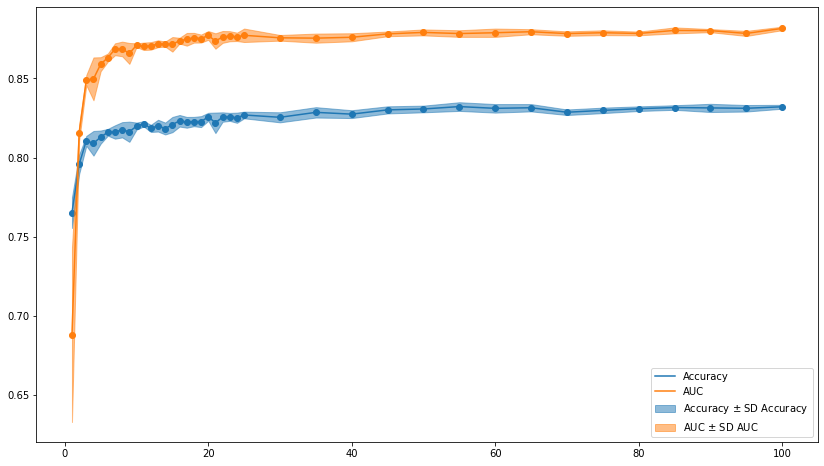

In [20]:
result = evaluate_n_epochs_through_prediction(data_train, data_test, dataset_dir = dataset_epochs_comparison_dir,
                                     n_epochs_vec = n_epochs_vec, n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
                                    save_dir = image_dir, save_path = "predictive_performance_against_n_epochs.svg",
                                             legend_pos="lower right")

In [82]:
result

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,Epochs1,0.765139,0.687973,0.009671,0.055176
1,Epochs2,0.795750,0.815595,0.006211,0.004869
2,Epochs3,0.810571,0.848965,0.003098,0.003217
3,Epochs4,0.809004,0.849735,0.007799,0.013544
4,Epochs5,0.812922,0.859003,0.004153,0.004424
5,Epochs6,0.815976,0.863185,0.002142,0.002561
6,Epochs7,0.816162,0.868443,0.004239,0.003764
7,Epochs8,0.817556,0.868657,0.004831,0.004620
8,Epochs9,0.816308,0.865819,0.006393,0.006611
9,Epochs10,0.819867,0.871027,0.002240,0.001151


In [19]:
dataset_lr_comparison_dir = os.path.join(const.dir.data_gen(), "tabGAN-qtr//Learning_rate_comparison")
lr_vec = [1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 1e-5]
path_finished_lr = ".//Python_objects//qtr_existing_lr_tracker.pkl"
n_synthetic_datasets_lr_comparison = 5
n_epochs_lr = 100

def create_tabGAN_for_lr(opt_lr):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [35]:
%run "$utils_path"
generate_multiple_datasets_for_multiple_hyperparameters(create_tabGAN_func=create_tabGAN_for_lr,
                                                        hyperparams_vec=lr_vec, n_epochs=n_epochs_lr,
                                                        dataset_dir=dataset_lr_comparison_dir,
                                                        n_synthetic_datasets=n_synthetic_datasets_lr_comparison,
                                                        restart = False, path_finished_hyperparams = path_finished_lr,
                                                        redo_hyperparams_vec = [], plot_only_new_progress = True,
                                                        hyperparams_name = "learning_rate")

Hyperparameters subfolder creation:   0%|          | 0/5 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

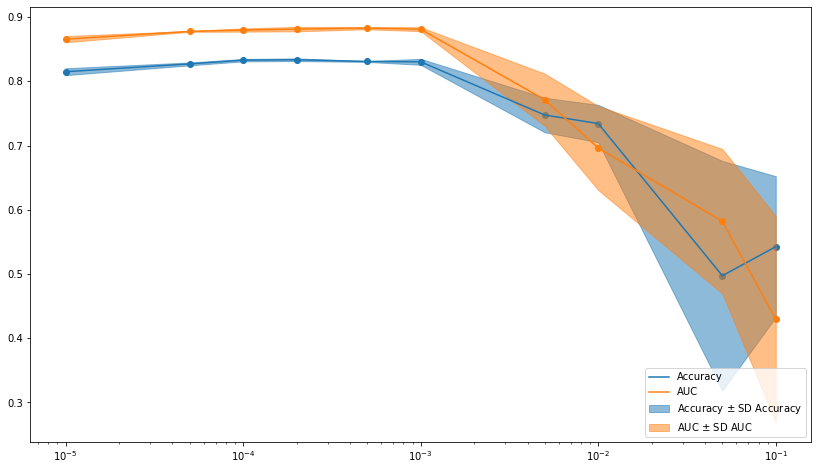

In [38]:
%run "$utils_path"
result_lr = evaluate_hyperparams_through_prediction(data_train, data_test, dataset_dir = dataset_lr_comparison_dir,
                                                 hyperparams_vec=lr_vec,
                                                    hyperparams_name = "learning_rate",
                                                 n_synthetic_datasets = n_synthetic_datasets_lr_comparison,
                                                 save_dir = image_dir,
                                                 save_path = "predictive_performance_against_lr.svg",
                                                 legend_pos="lower right", x_scale="log")

In [39]:
result_lr

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,learning_rate_0.1,0.542590,0.429805,0.109769,0.160546
1,learning_rate_0.05,0.497397,0.582190,0.178773,0.112573
2,learning_rate_0.01,0.734316,0.696274,0.029129,0.065320
3,learning_rate_0.005,0.747623,0.771309,0.026860,0.040774
4,learning_rate_0.001,0.830452,0.881271,0.004635,0.003070
5,learning_rate_0.0005,0.830983,0.882891,0.000681,0.001777
6,learning_rate_0.0002,0.833705,0.881402,0.002065,0.003449
7,learning_rate_0.0001,0.833054,0.879992,0.001889,0.002528
8,learning_rate_5e-05,0.827224,0.877832,0.002241,0.000639
9,learning_rate_1e-05,0.815060,0.865679,0.005388,0.004818


In [32]:
dataset_adam_beta1_comparison_dir = os.path.join(const.dir.data_gen(), "tabGAN-qtr//Adam_beta1_comparison")
adam_beta1_vec = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
path_finished_adam_beta1 = ".//Python_objects//qtr_existing_adam_beta1_tracker.pkl"
n_synthetic_datasets_adam_beta1_comparison = 5
n_epochs_adam_beta1 = 100

def create_tabGAN_for_adam_beta1(adam_beta1):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [33]:
%run "$utils_path"
generate_multiple_datasets_for_multiple_hyperparameters(create_tabGAN_func=create_tabGAN_for_adam_beta1,
                                                        hyperparams_vec=adam_beta1_vec, n_epochs=n_epochs_adam_beta1,
                                                        dataset_dir=dataset_adam_beta1_comparison_dir,
                                                        n_synthetic_datasets=n_synthetic_datasets_adam_beta1_comparison,
                                                        restart = False, path_finished_hyperparams = path_finished_adam_beta1,
                                                        redo_hyperparams_vec = [], plot_only_new_progress = True,
                                                        hyperparams_name = "Adam_beta1")

Hyperparameters subfolder creation:   0%|          | 0/1 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

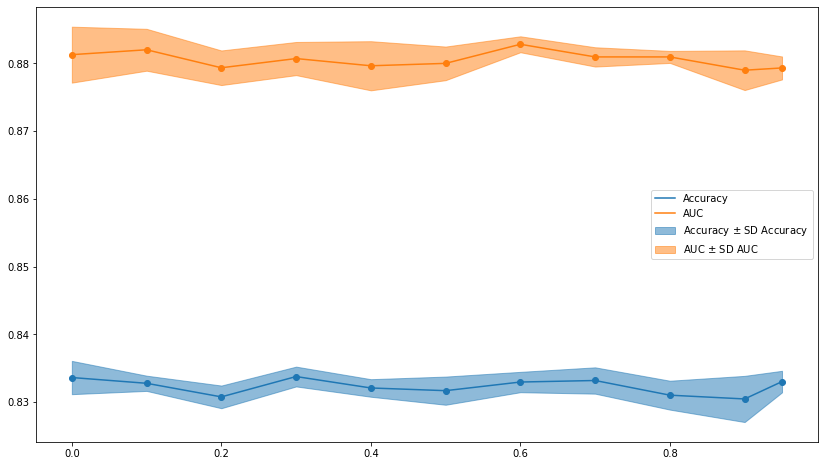

In [34]:
%run "$utils_path"
result_adam_beta1 = evaluate_hyperparams_through_prediction(data_train, data_test,
                                                            dataset_dir = dataset_adam_beta1_comparison_dir,
                                                 hyperparams_vec=adam_beta1_vec,
                                                    hyperparams_name = "Adam_beta1",
                                                 n_synthetic_datasets = n_synthetic_datasets_adam_beta1_comparison,
                                                 save_dir = image_dir,
                                                 save_path = "predictive_performance_against_adam_beta1.svg",
                                                 legend_pos="best")

In [35]:
result_adam_beta1

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,Adam_beta1_0,0.833639,0.881278,0.002455,0.004128
1,Adam_beta1_0.1,0.832789,0.882001,0.001124,0.003088
2,Adam_beta1_0.2,0.830784,0.879345,0.001672,0.002553
3,Adam_beta1_0.3,0.833785,0.880704,0.001461,0.002446
4,Adam_beta1_0.4,0.832098,0.879639,0.001296,0.003625
5,Adam_beta1_0.5,0.831700,0.879993,0.002079,0.002480
6,Adam_beta1_0.6,0.832975,0.882811,0.001500,0.001176
7,Adam_beta1_0.7,0.833201,0.880946,0.001941,0.001423
8,Adam_beta1_0.8,0.831036,0.880944,0.002132,0.000885
9,Adam_beta1_0.9,0.830478,0.878985,0.003406,0.002928


In [5]:
dataset_adam_beta2_comparison_dir = os.path.join(const.dir.data_gen(), "tabGAN-qtr//Adam_beta2_comparison")
adam_beta2_vec = [0.01, 0.5, 0.999]
path_finished_adam_beta2 = ".//Python_objects//qtr_existing_adam_beta2_tracker.pkl"
n_synthetic_datasets_adam_beta2_comparison = 5
n_epochs_adam_beta2 = 100

def create_tabGAN_for_adam_beta2(adam_beta2):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      adam_beta2=adam_beta2, quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [6]:
%run "$utils_path"
generate_multiple_datasets_for_multiple_hyperparameters(create_tabGAN_func=create_tabGAN_for_adam_beta2,
                                                        hyperparams_vec=adam_beta2_vec, n_epochs=n_epochs_adam_beta2,
                                                        dataset_dir=dataset_adam_beta2_comparison_dir,
                                                        n_synthetic_datasets=n_synthetic_datasets_adam_beta2_comparison,
                                                        restart=False, path_finished_hyperparams=path_finished_adam_beta2,
                                                        redo_hyperparams_vec=[], plot_only_new_progress=True,
                                                        hyperparams_name = "Adam_beta2")

Hyperparameters subfolder creation:   0%|          | 0/1 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

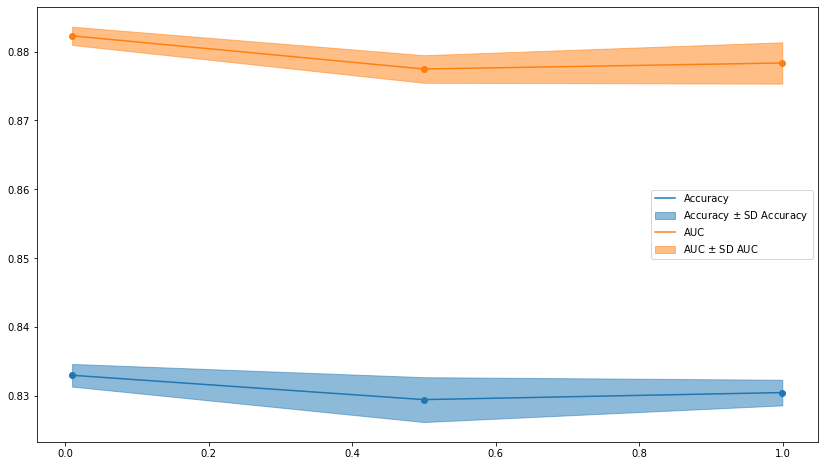

In [7]:
%run "$utils_path"
result_adam_beta2 = evaluate_hyperparams_through_prediction(data_train, data_test,
                                                            dataset_dir = dataset_adam_beta2_comparison_dir,
                                                 hyperparams_vec=adam_beta2_vec,
                                                    hyperparams_name = "Adam_beta2",
                                                 n_synthetic_datasets = n_synthetic_datasets_adam_beta2_comparison,
                                                 save_dir = image_dir,
                                                 save_path = "predictive_performance_against_adam_beta2.svg",
                                                 legend_pos="best")

In [8]:
result_adam_beta2

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,Adam_beta2_0.01,0.833028,0.882279,0.001644,0.001328
1,Adam_beta2_0.5,0.829495,0.877468,0.003253,0.002003
2,Adam_beta2_0.999,0.830518,0.878340,0.001860,0.002999
